In [2]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [3]:
url="https://raw.githubusercontent.com/jbrun0r/predicting-heart-disease/main/heart.csv"
data=pd.read_csv(url)


In [4]:
print(data.head())
print(data.info())
print(data.describe())
print(data.isnull().sum())

   age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       

In [5]:
print("this knn model")
X=data[["age","sex","cp","chol","trtbps","fbs","restecg","oldpeak", "caa" ,"slp","thalachh" , "exng","thall" , "output" ]] 
y=data["output"]

this knn model


In [6]:
X_train ,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2, random_state=42)
knn=KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train,y_train)

,n_neighbors,4
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [7]:
y_pred=knn.predict(X_test)
accuracy_knn=accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy_knn)

Accuracy: 0.6721311475409836


In [8]:
conf_matrix=confusion_matrix(y_pred,y_test)
print("Confusion Matrix:\n",conf_matrix)

Confusion Matrix:
 [[22 13]
 [ 7 19]]


In [9]:
conf_report=classification_report(y_test,y_pred)
print("Classification Report:\n",conf_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.76      0.69        29
           1       0.73      0.59      0.66        32

    accuracy                           0.67        61
   macro avg       0.68      0.68      0.67        61
weighted avg       0.68      0.67      0.67        61



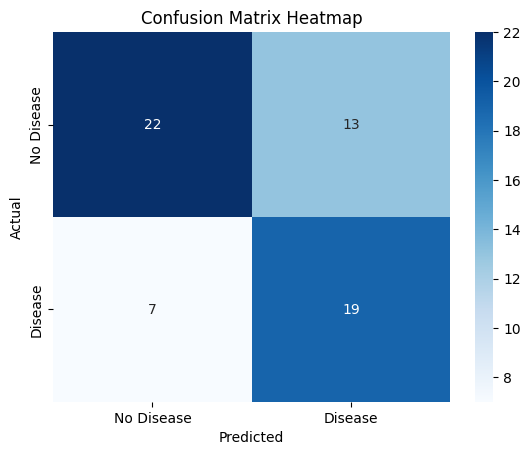

In [10]:
plt.Figure(figsize=(10,7))
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='Blues',xticklabels=['No Disease','Disease'],yticklabels=['No Disease','Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

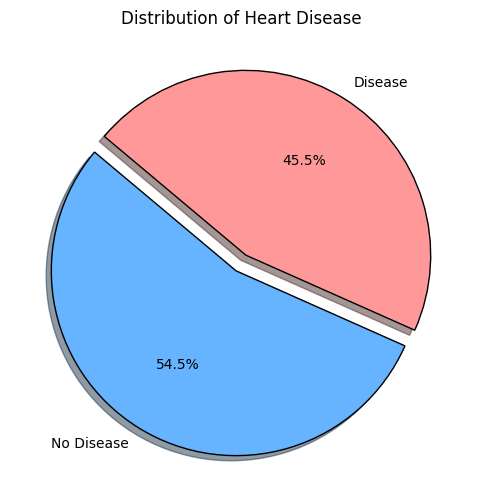

In [20]:
plt.figure(figsize=(8,6))
plt.pie(data['output'].value_counts(), labels=['No Disease', 'Disease'], autopct='%1.1f%%',
        shadow=True, startangle=140,
        explode=explode,
        wedgeprops={'edgecolor': 'black'},
        
         colors=['#66b3ff','#ff9999'])
plt.title('Distribution of Heart Disease')
plt.show()

In [12]:
X_train ,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2, random_state=42) 
tree=DecisionTreeClassifier(random_state=42)
tree.fit(X_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [13]:
y_pred=tree.predict(X_test)
accuracy_tree=accuracy_score(y_test,y_pred)
print("Decision Tree Accuracy:",accuracy_tree)

Decision Tree Accuracy: 1.0


In [14]:
conf_matrix_tree=confusion_matrix(y_pred,y_test)
print("Confusion Matrix:\n",conf_matrix_tree)


Confusion Matrix:
 [[29  0]
 [ 0 32]]


In [15]:
conf_report_tree=classification_report(y_pred,y_test)
print("Classification Report:\n",conf_report_tree)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        32

    accuracy                           1.00        61
   macro avg       1.00      1.00      1.00        61
weighted avg       1.00      1.00      1.00        61



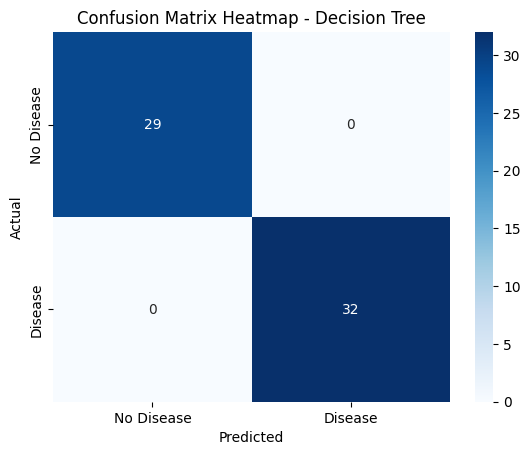

In [16]:
plt.Figure(figsize=(10,7))
sns.heatmap(conf_matrix_tree,annot=True,fmt="d",cmap="Blues",xticklabels=['No Disease','Disease'],yticklabels=['No Disease','Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap - Decision Tree')
plt.show()

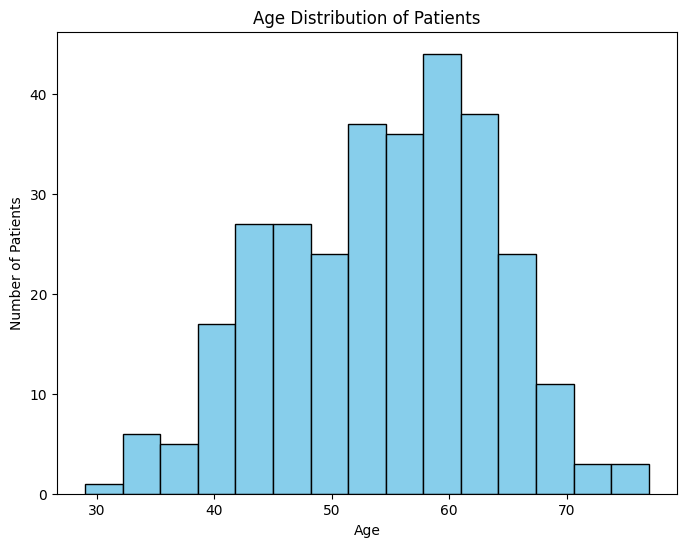

In [17]:
plt.figure(figsize=(8,6))
plt.hist(data['age'], bins=15, color='skyblue', edgecolor='black')
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.show()

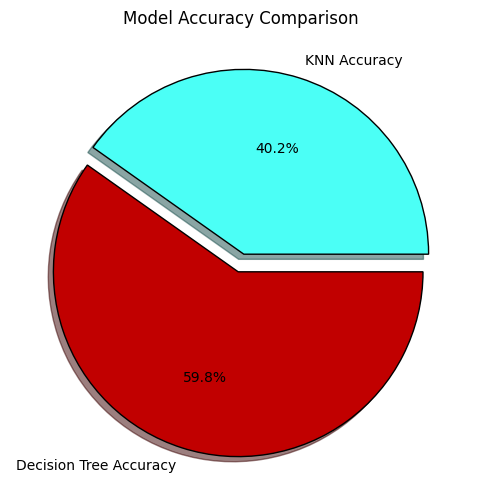

In [18]:
accuracy_score_list=[accuracy_knn,accuracy_tree]

explode = [0.05, 0.05]  # Öne çıkarılacak dilimler

plt.figure(figsize=(8,6))
plt.pie(accuracy_score_list, labels=['KNN Accuracy', 'Decision Tree Accuracy'], autopct='%1.1f%%', colors=["#4BFFF6","#C10000"],
   explode=explode,         # Öne çıkarılacak dilimler
    shadow=True,             # Gölge ekleme (grafiğe 3D hissi verir)
    wedgeprops={'edgecolor':'black'} )
plt.title('Model Accuracy Comparison')
plt.show()


In [29]:
new_data = ({
   "age": [54],
    "sex": [1],
    "cp": [2],
    "chol": [240],
    "trtbps": [130],
    "fbs": [0],
    "restecg": [1],
    "oldpeak": [1.2],
    "caa": [0],
    "slp": [2],
    "thalachh": [150],
    "exng": [0],
    "thall": [2],
    "output": [1]  
})
new_df=pd.DataFrame(new_data)
pridicion=knn.predict(new_df)
print("peridicion",pridicion)


if pridicion[0]==1:
    print("the person has a heart disease")
else:
    print("the person has not a heart disease")

peridicion [0]
the person has not a heart disease


In [30]:
new_data = ({
   "age": [54],
    "sex": [1],
    "cp": [2],
    "chol": [240],
    "trtbps": [130],
    "fbs": [0],
    "restecg": [1],
    "oldpeak": [1.2],
    "caa": [0],
    "slp": [2],
    "thalachh": [150],
    "exng": [0],
    "thall": [2],
    "output": [1]  
})

new_df=pd.DataFrame(new_data)
predicons=tree.predict(new_df)
print("peridicion",predicons)
if predicons[0]==1:
    print("the person has a heart disease")
else:
    print("the person has not a heart disease")

peridicion [1]
the person has a heart disease
